    Actual  Predicted
0     33.6  37.517582
1     47.9  37.518695
2     38.6  38.208080
3     33.6  40.404940
4     38.3  37.475411
5     37.4  39.528374
6     33.3  33.286345
7     27.3  33.255711
8     35.6  35.703001
9     37.2  26.981338
10    31.4  30.318500
11    45.1  42.061782
12    25.0  26.673829
13    29.9  27.772872
14    33.8  39.051339
15    44.0  49.249558
16    27.3  33.255711
17    46.5  44.846363
18    46.1  43.703132
19    36.7  28.070511
The testing accuracy is 73.57343647004429 %
The tarining accuracy is 75.16444735272759 %


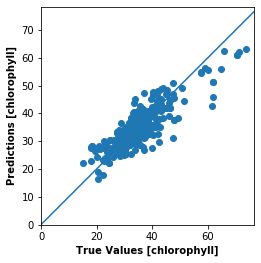

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score
dataset = pd.read_csv('D:/UTPAL PHD/Tea leaf project/chlorophyll value/tea_leaf_750_image_modifiedd.csv')
X = dataset[['mean_r','mean_g', 'mean_b', 'stddev_r', 'stddev_g','stddev_b', 'variance', 'stddv_h', 'stddv_s', 'stddv_v', 'kurtosis', 'skewness'
]].values
y = dataset['Chl Value'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, ['mean_r','mean_g', 'mean_b', 'stddev_r', 'stddev_g','stddev_b', 'variance', 'stddv_h', 'stddv_s', 'stddv_v', 'kurtosis', 'skewness'
], columns=['Coefficient'])
coeff_df
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
print(df1)
accuracy = regressor.score(X_test,y_test)
print('The testing accuracy is',accuracy*100,'%')
accuracy1 = regressor.score(X_train,y_train)
print('The tarining accuracy is',accuracy1*100,'%')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [chlorophyll]')
plt.ylabel('Predictions [chlorophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('D:/UTPAL PHD/Tea Leaf Journal Paper/Pic/lr.png', dpi=350, bbox_inches='tight')

Mean Absolute Error(MAE) 3.700366829352224
Mean Squared Error(MSE) 23.12588959159738
Root Mean Squared Error(RMSE) 4.808938509858218
R Squared 0.7357343647004428


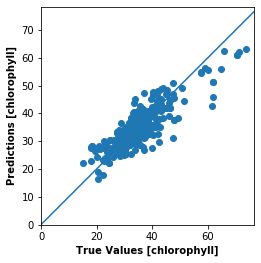

In [8]:
print ('Mean Absolute Error(MAE)',metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error(MSE)',metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error(RMSE)',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))     #test_size = 0.40
print('R Squared',metrics.r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [chlorophyll]')
plt.ylabel('Predictions [chlorophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('D:/UTPAL PHD/Tea Leaf Journal Paper/Pic/LR.png', dpi=450, bbox_inches='tight')

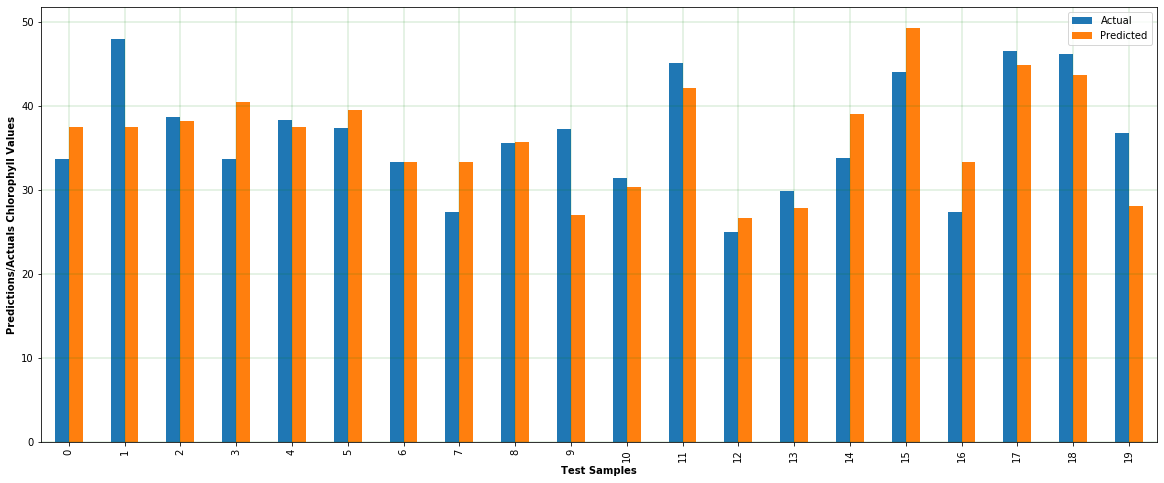

In [9]:
df1.plot(kind='bar',figsize=(20,8))
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.xlabel('Test Samples')
plt.ylabel('Predictions/Actuals Chlorophyll Values')
plt.savefig('D:/UTPAL PHD/Tea Leaf Journal Paper/Pic/lr_predcted.png', dpi=450, bbox_inches='tight')
plt.show()